<a href="https://colab.research.google.com/github/abhigyan2003/CNN/blob/main/dataaugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [11]:
import os
import tensorflow as tf
import pathlib

# Download and extract
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

# Check actual path
print("Downloaded to:", data_dir)

# Use pathlib to inspect the folder
data_dir = pathlib.Path(data_dir)

# Check if there's a nested 'flower_photos' folder inside
subdirs = list(data_dir.glob('*'))
print("Subdirectories:", subdirs)

Downloaded to: /root/.keras/datasets/flower_photos
Subdirectories: [PosixPath('/root/.keras/datasets/flower_photos/flower_photos')]


In [12]:
data_dir = data_dir / "flower_photos"

# Get images
image_paths = list(data_dir.glob('*/*.jpg'))
print(image_paths[:5])
print("Total images:", len(image_paths))

[PosixPath('/root/.keras/datasets/flower_photos/flower_photos/sunflowers/18766965343_9f42d4bedc_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/flower_photos/sunflowers/3001536784_3bfd101b23_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/flower_photos/sunflowers/15839183375_49bf4f75e8_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/flower_photos/sunflowers/3912497870_a2f91c3a65_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/flower_photos/sunflowers/19915160340_ec904edbdf_n.jpg')]
Total images: 3670


In [13]:

roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/6473543547_4fefdbd5dc.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/6209630964_e8de48fe04_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/2491600761_7e9d6776e8_m.jpg')]

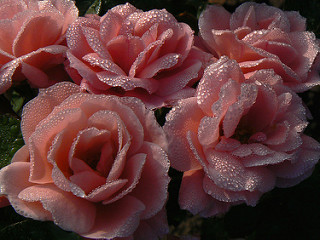

In [14]:
PIL.Image.open(str(roses[1]))


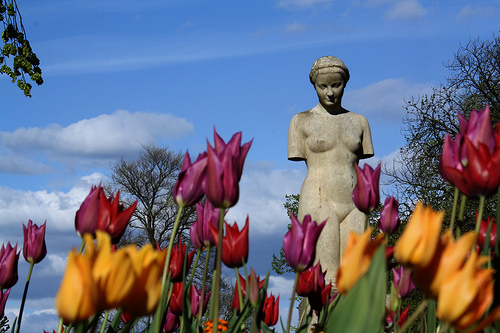

In [15]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [16]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [17]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [18]:
flowers_images_dict['roses'][:5]

[PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/6473543547_4fefdbd5dc.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/6209630964_e8de48fe04_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/2491600761_7e9d6776e8_m.jpg')]

In [19]:

str(flowers_images_dict['roses'][0])

'/root/.keras/datasets/flower_photos/flower_photos/roses/6473543547_4fefdbd5dc.jpg'

In [20]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [21]:
img.shape

(333, 500, 3)

In [22]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [23]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [24]:

X = np.array(X)
y = np.array(y)

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3719 - loss: 1.4503
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5944 - loss: 0.9852
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6741 - loss: 0.8634
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7649 - loss: 0.6420
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8543 - loss: 0.4037
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9255 - loss: 0.2279
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9693 - loss: 0.1144
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9863 - loss: 0.0559
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9940 - loss: 0.0359
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9978 - loss: 0.0186
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9909 - loss: 0.0365
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy:

In [28]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6591 - loss: 3.0310


[2.7418100833892822, 0.6655773520469666]

In [29]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


array([[ 13.20055   ,   6.43112   , -18.27547   , -21.941439  ,
          8.965059  ],
       [ 11.230171  ,  -8.767501  , -15.30981   ,   3.8590026 ,
         10.363457  ],
       [ -3.2875426 ,  -7.921006  ,   6.94056   , -11.719362  ,
         -3.636903  ],
       ...,
       [ -5.074614  ,  -6.530876  ,   6.5179687 ,  13.0573015 ,
          0.6986105 ],
       [  4.2399364 ,  -4.910556  ,   1.0605061 ,  -0.80033445,
         -2.255576  ],
       [ -7.926232  ,  -7.4839697 ,   2.5200505 ,  12.165674  ,
          1.4277544 ]], dtype=float32)

In [30]:

score = tf.nn.softmax(predictions[0])

In [31]:
np.argmax(score)

np.int64(0)

In [32]:

y_test[0]

np.int64(1)

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


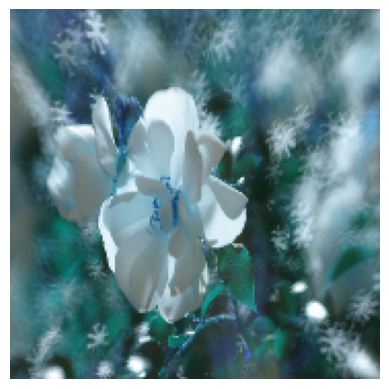

In [36]:

plt.axis('off')
plt.imshow(X[0])

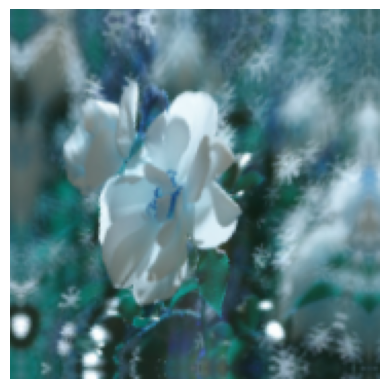

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [38]:

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.3450 - loss: 1.4936
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5580 - loss: 1.0906
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6138 - loss: 0.9869
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6520 - loss: 0.8761
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6756 - loss: 0.8416
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7066 - loss: 0.7593
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7112 - loss: 0.7459
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7342 - loss: 0.6877
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7587 - loss: 0.6501
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7540 - loss: 0.6527
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7701 - loss: 0.6236
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy:

In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6911 - loss: 1.0569


[0.9599459767341614, 0.7156862616539001]